In [1]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt

from py4DSTEM.file.datastructure import DiffractionSlice, RealSlice
from py4DSTEM.process.preprocess import get_darkreference
from py4DSTEM.process.preprocess import get_bksbtr_DP

In [2]:
# Load data

fp = "/media/AuxDriveB/Data/20190627_aSi_Shiteng/aSi1.dm4"
dc = py4DSTEM.file.io.read(fp) # datacube import

/media/AuxDriveB/Data/20190627_aSi_Shiteng/aSi1.dm4 is not a py4DSTEM file.
Reading with hyperspy...


### Background subtraction

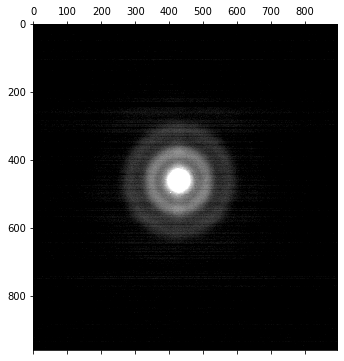

In [3]:
power = 0.2
nstd = 3

ave_dp = np.average(dc.data,axis=(0,1))

fig,ax = plt.subplots(figsize=(6,6)) 
ax.matshow(ave_dp**power, vmin=np.mean(ave_dp**power), vmax=np.mean(ave_dp**power)+nstd*np.std(ave_dp**power))
plt.show()

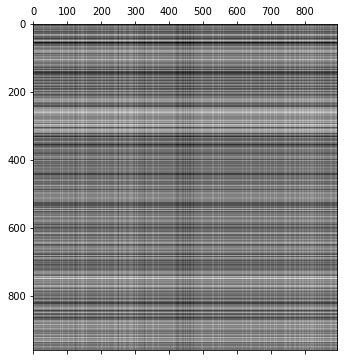

In [4]:
# Get background streaking in the x- and y-directions

darkref = get_darkreference(datacube=dc, N_frames=50,      # number of random DPs to average
                                         width_x=30,       # width of strip on side of DP to average streaks over
                                         width_y=30,          
                                         side_x='end',     # use a strip on the array left/right (top/bottom)
                                         side_y='end')

# Show
fig,ax=plt.subplots(figsize=(6,6))
ax.matshow(darkref)
plt.show()

In [5]:
# New datacube

data=dc.data - darkref
data[data<0] = 0
bksbtr_dc = py4DSTEM.file.datastructure.DataCube(data, name='datacube_bksbtr')

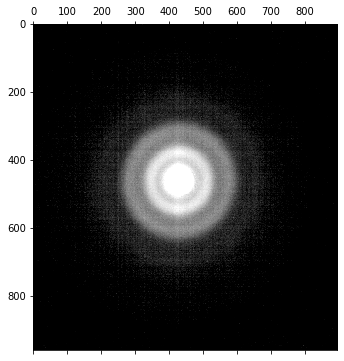

In [6]:
power = 0.2
nstd = 3

ave_dp_bksbtr = np.average(bksbtr_dc.data,axis=(0,1))

fig,ax = plt.subplots(figsize=(6,6)) 
ax.matshow(ave_dp_bksbtr**power, vmin=np.mean(ave_dp_bksbtr**power), vmax=np.mean(ave_dp_bksbtr**power)+nstd*np.std(ave_dp_bksbtr**power))
plt.show()

### Save

In [8]:
savepath = "/media/AuxDriveB/Data/20190627_aSi_Shiteng/aSi1_bksbtr.h5"
py4DSTEM.file.io.save(bksbtr_dc, savepath)

Creating file /media/AuxDriveB/Data/20190627_aSi_Shiteng/aSi1_bksbtr.h5...
Done.
